# LeNet
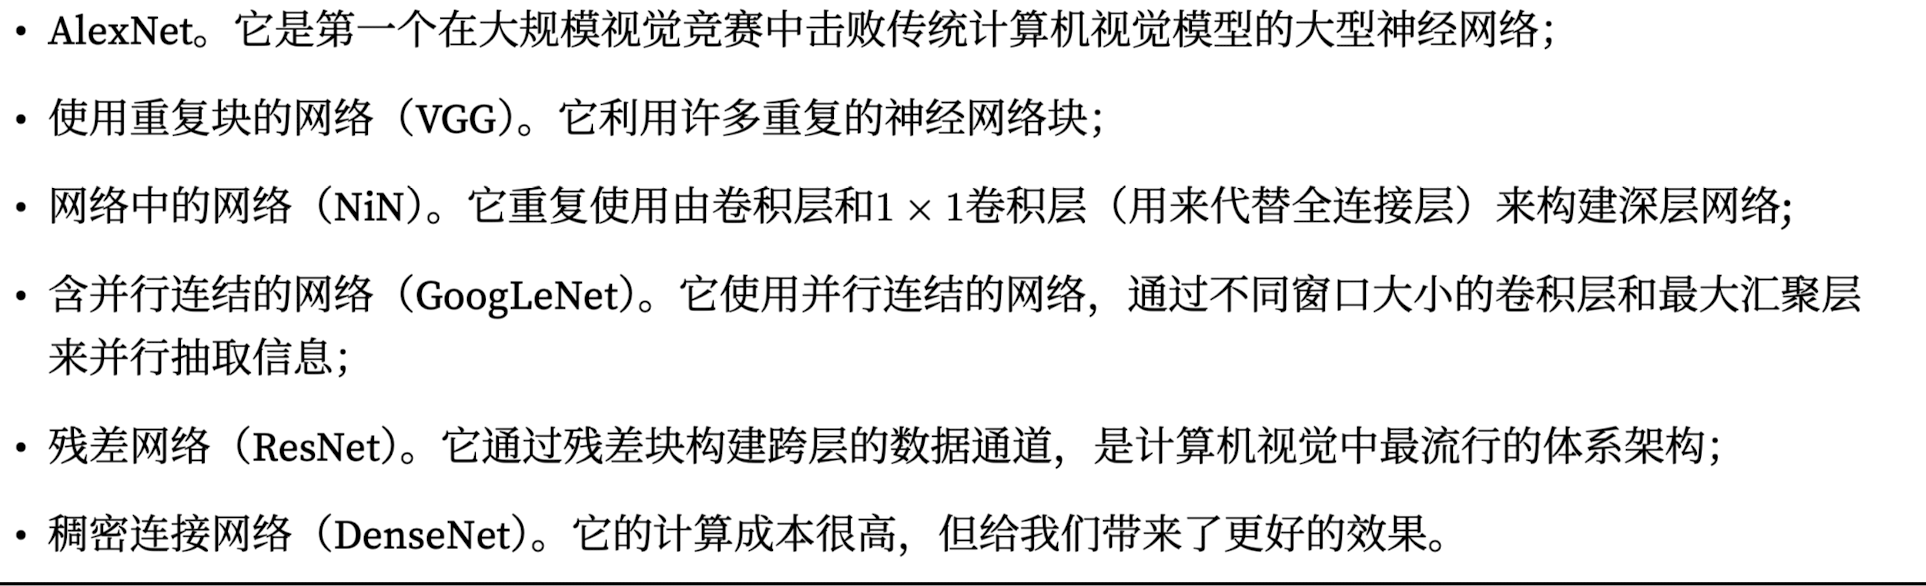

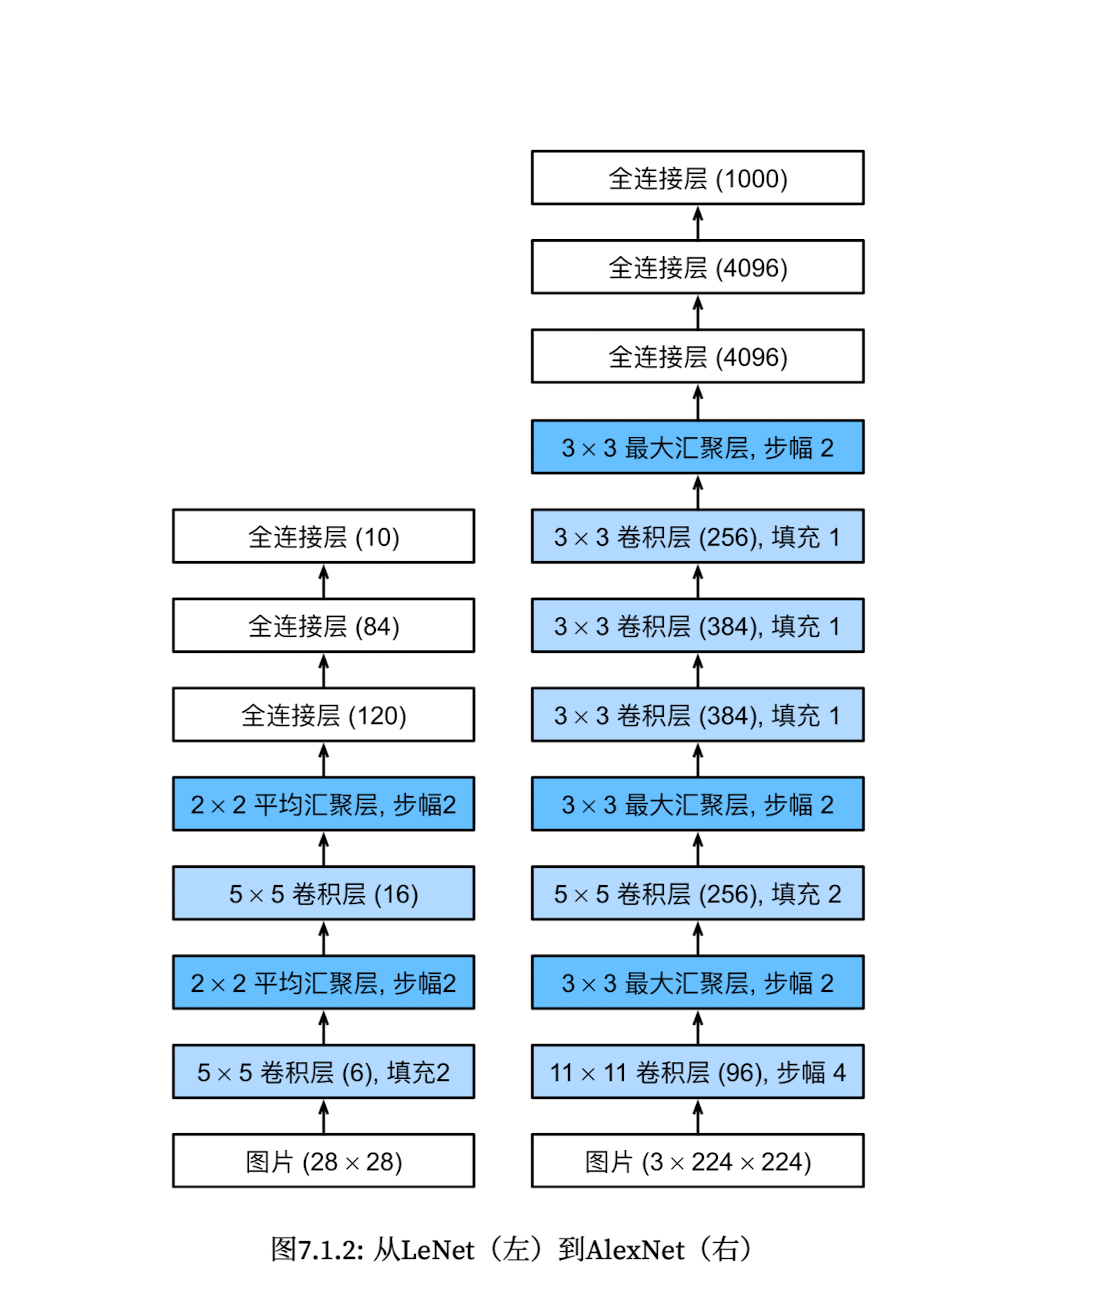

# AlexNet和LeNet
- AlexNet更深，由八层组成：5个卷积层、2个全连接隐藏层和1个全连接输出层
- AlexNet使用ReLU激活函数 LeNet使用的是sigmoid激活函数
  

  - 权重衰退和dropout不是一个东西？（好像雀氏

In [1]:
import torch
from torch import nn
import d2l.torch as d2l


In [5]:
net = nn.Sequential(
    # 这里使用一个11×11的更大窗口来捕捉对象
    # 同时，步幅为4，以减少输出的高度和宽度
    # 输出通道的数目远大于LeNet
    nn.Conv2d(1,96,kernel_size=11,stride=4,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),

    # 减小卷积窗口，使用填充为2来使得输入和输出的高和宽一致，且增大输出通道数
    nn.Conv2d(96,256,kernel_size=5,padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),

    # 使用三个连续的卷积层和较小的卷积窗口
    # 除了最后的卷积层，输出通道的数量进一步增加
    # 在前两个卷积层之后，pooling不用于减少输入的高度和宽度
    nn.Conv2d(256,384,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Flatten(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout来减轻过拟合
    nn.Linear(6400,4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096,4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    # 最后是输出层，由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(4096,10)
)
# 需要纠结这个网络是怎么设计出来的吗？以及参数的设定

In [6]:
# 构造高度和宽度都为224的单通道数据，观察每一层的输出形状，与AlexNet架构相匹配
X = torch.randn(1,1,224,224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape"\t',X.shape)

Conv2d output shape"	 torch.Size([1, 96, 54, 54])
ReLU output shape"	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape"	 torch.Size([1, 96, 26, 26])
Conv2d output shape"	 torch.Size([1, 256, 26, 26])
ReLU output shape"	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape"	 torch.Size([1, 256, 12, 12])
Conv2d output shape"	 torch.Size([1, 384, 12, 12])
ReLU output shape"	 torch.Size([1, 384, 12, 12])
Conv2d output shape"	 torch.Size([1, 384, 12, 12])
ReLU output shape"	 torch.Size([1, 384, 12, 12])
Conv2d output shape"	 torch.Size([1, 256, 12, 12])
ReLU output shape"	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape"	 torch.Size([1, 256, 5, 5])
Flatten output shape"	 torch.Size([1, 6400])
Linear output shape"	 torch.Size([1, 4096])
ReLU output shape"	 torch.Size([1, 4096])
Dropout output shape"	 torch.Size([1, 4096])
Linear output shape"	 torch.Size([1, 4096])
ReLU output shape"	 torch.Size([1, 4096])
Dropout output shape"	 torch.Size([1, 4096])
Linear output shape"	 torch.Size([1,

In [7]:
batch_size=128
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)

KeyboardInterrupt: 

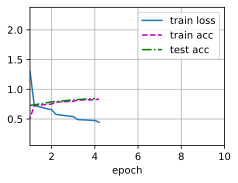

In [8]:
lr,num_epochs = 0.01,10
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

# 深度卷积网络AlexNet
# VGG块

In [9]:
def vgg_block(num_convs,in_channels,out_channels):
    # 这段代码定义了一个函数 vgg_block，
    # 用于构建 VGG 网络中的一个卷积块。
    # 该函数接受三个参数：
    # num_convs 表示卷积层的数量，
    # in_channels 表示输入通道数，
    # out_channels 表示输出通道数。
    layers = []
    # 首先创建了一个空列表 layers 用于存储卷积块中的各个层。
    for _ in range(num_convs):
        # 通过一个 for 循环，
        # 向 layers 列表中添加 num_convs 个卷积层和 ReLU 激活函数。
        # 每个卷积层都使用 3x3 的卷积核和填充大小为 1，以保持特征图的大小不变。
        # 在每个卷积层之后，都会添加一个 ReLU 激活函数来引入非线性。
        layers.append(nn.Conv2d(
            in_channels,out_channels,kernel_size=3,padding=1
        ))
        layers.append(nn.ReLU())
        in_channels = out_channels
        # 将 in_channels 更新为 out_channels，以便在下一次迭代中使用正确的输入通道数。
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    # 在所有卷积层添加完毕之后，
    # 将一个最大池化层添加到 layers 列表中。
    # 这个最大池化层的池化窗口大小是 2x2，步幅是 2，可以将特征图的尺寸减半。
    return nn.Sequential(*layers)
# 通过 nn.Sequential(*layers) 创建一个包含所有层的顺序容器，并将其作为函数的返回值。
# 这个函数的作用是构建 VGG 网络中的一个卷积块，包含多个卷积层、激活函数和最大池化层，
# 并返回这个卷积块作为一个顺序容器。这样可以在构建整个 VGG 网络时重复使用这个卷积块，以便构建更深的网络结构。

nn.Sequential(*layers)

在 Python 中，星号 `*` 被用作解包运算符。

在 `nn.Sequential(*layers)` 中，`*layers` 将列表 `layers` 中的元素**解包**，作为参数传递给 `nn.Sequential` 函数。

`nn.Sequential` 是 PyTorch 中的一个顺序容器，它可以按照添加的顺序依次执行其中的层。

当我们将 `*layers` 作为参数传递给 `nn.Sequential` 时，它会将 `layers` 列表中的所有元素作为参数传递给 `nn.Sequential`，从而将这些层添加到顺序容器中。

使用 `*layers` 解包的好处是，可以方便地将一个列表中的元素作为独立的参数传递给函数。在这个例子中，`*layers` 将 `layers` 列表中的每个层都作为独立的参数传递给 `nn.Sequential`，使得 `nn.Sequential` 可以正确地接收并添加这些层到容器中。

换句话说，`nn.Sequential(*layers)` 的作用就是将 `layers` 列表中的层按照顺序添加到顺序容器中。

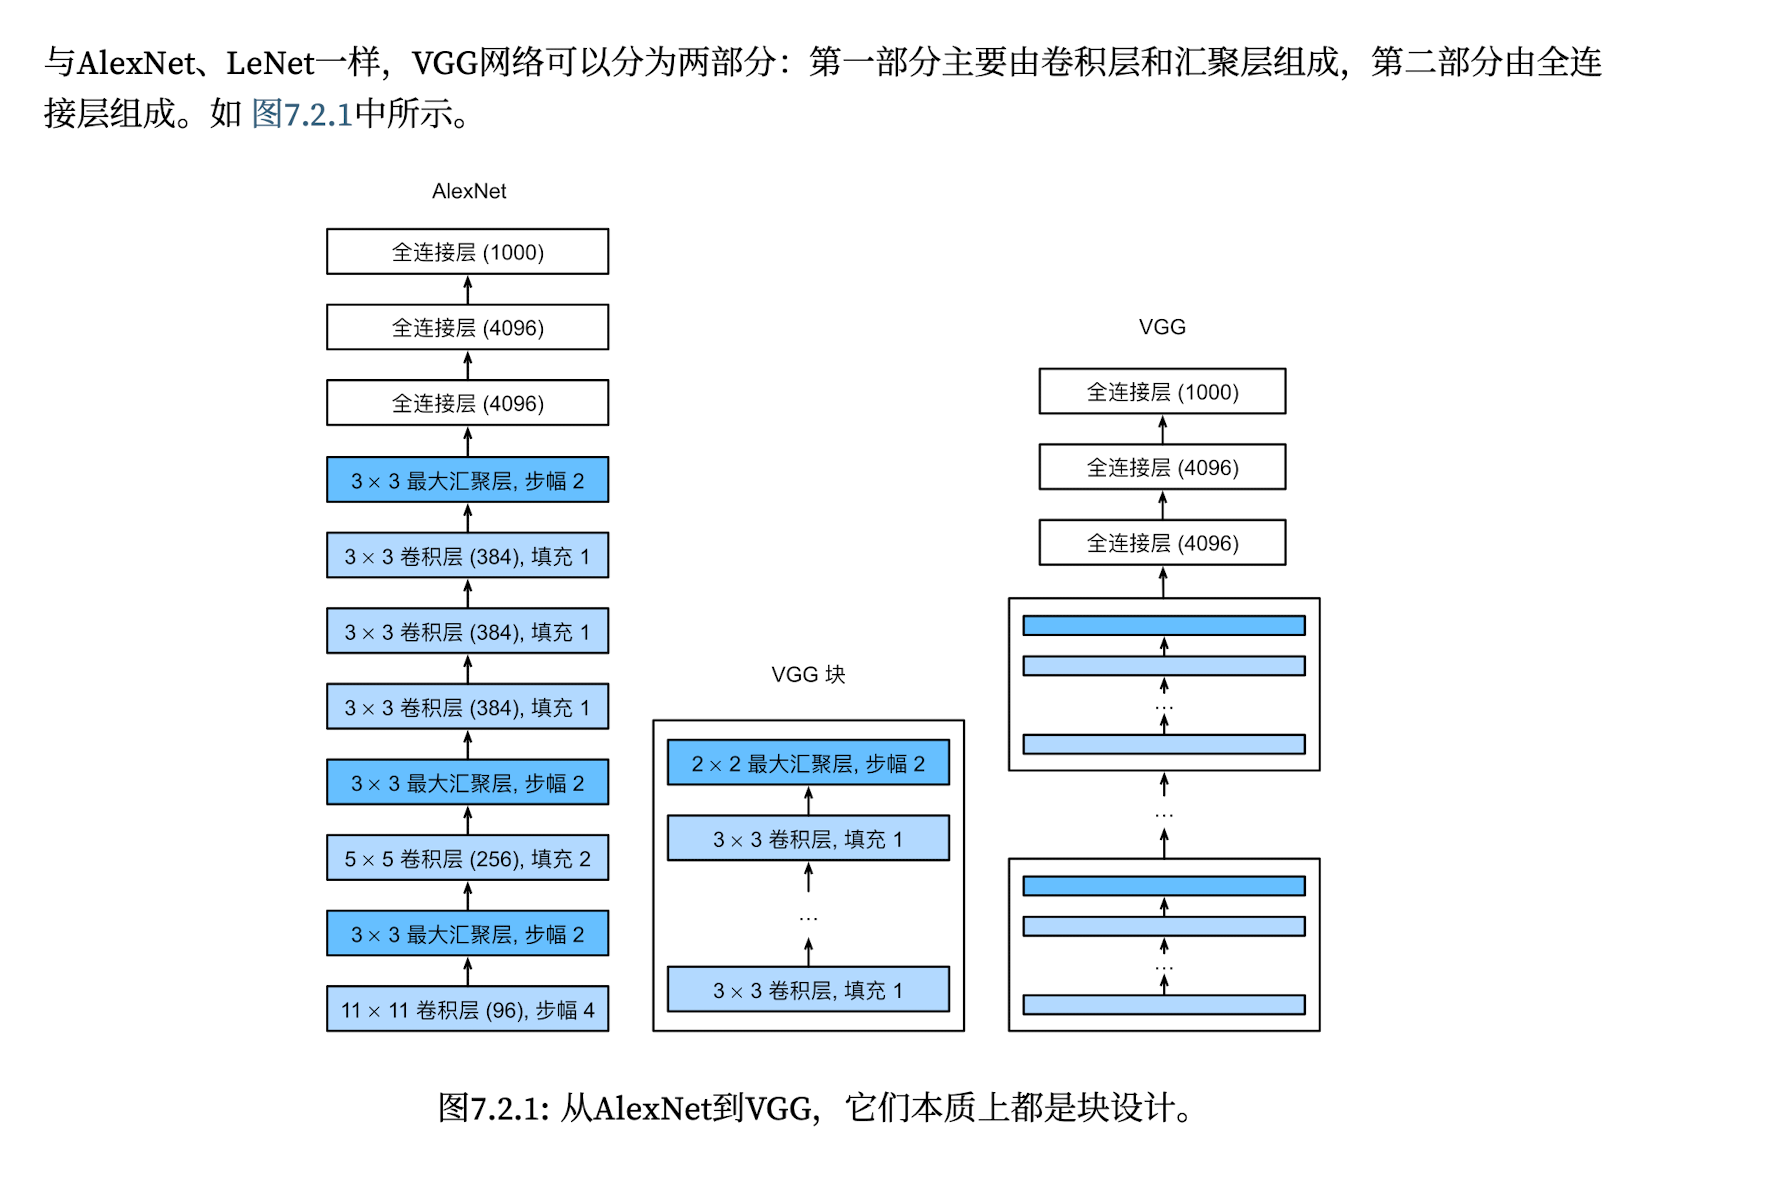

In [17]:
conv_arch = ((1,64),(1,128),(2,256),(2,512),(2,512))

In [18]:
# vgg11的实现
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # 卷积层部分
    for (num_convs,out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs,in_channels,out_channels))
        in_channels = out_channels
    
    return nn.Sequential(
        *conv_blks,
        nn.Flatten(),
        # 全连接层部分
        nn.Linear(out_channels*7*7,4096),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(4096,4096),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(4096,10)
    )

In [19]:
net = vgg(conv_arch)

In [20]:
# 构建一个高度和宽度为224的单通道数据样本，以观察每个层输出的形状
X= torch.randn(size=(1,1,224,224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)
    # 观察输出结果，每个块的高度和宽度减半，最终高度和宽度都为7
    # 最后再展平表示，送入全连接层处理

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [21]:
# 训练模型
ratio = 4
small_conv_arch = [(pair[0],pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

KeyboardInterrupt: 

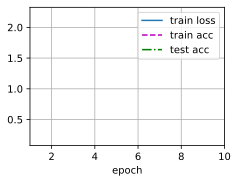

In [22]:
lr,num_epochs,batch_size=0.05,10,128
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

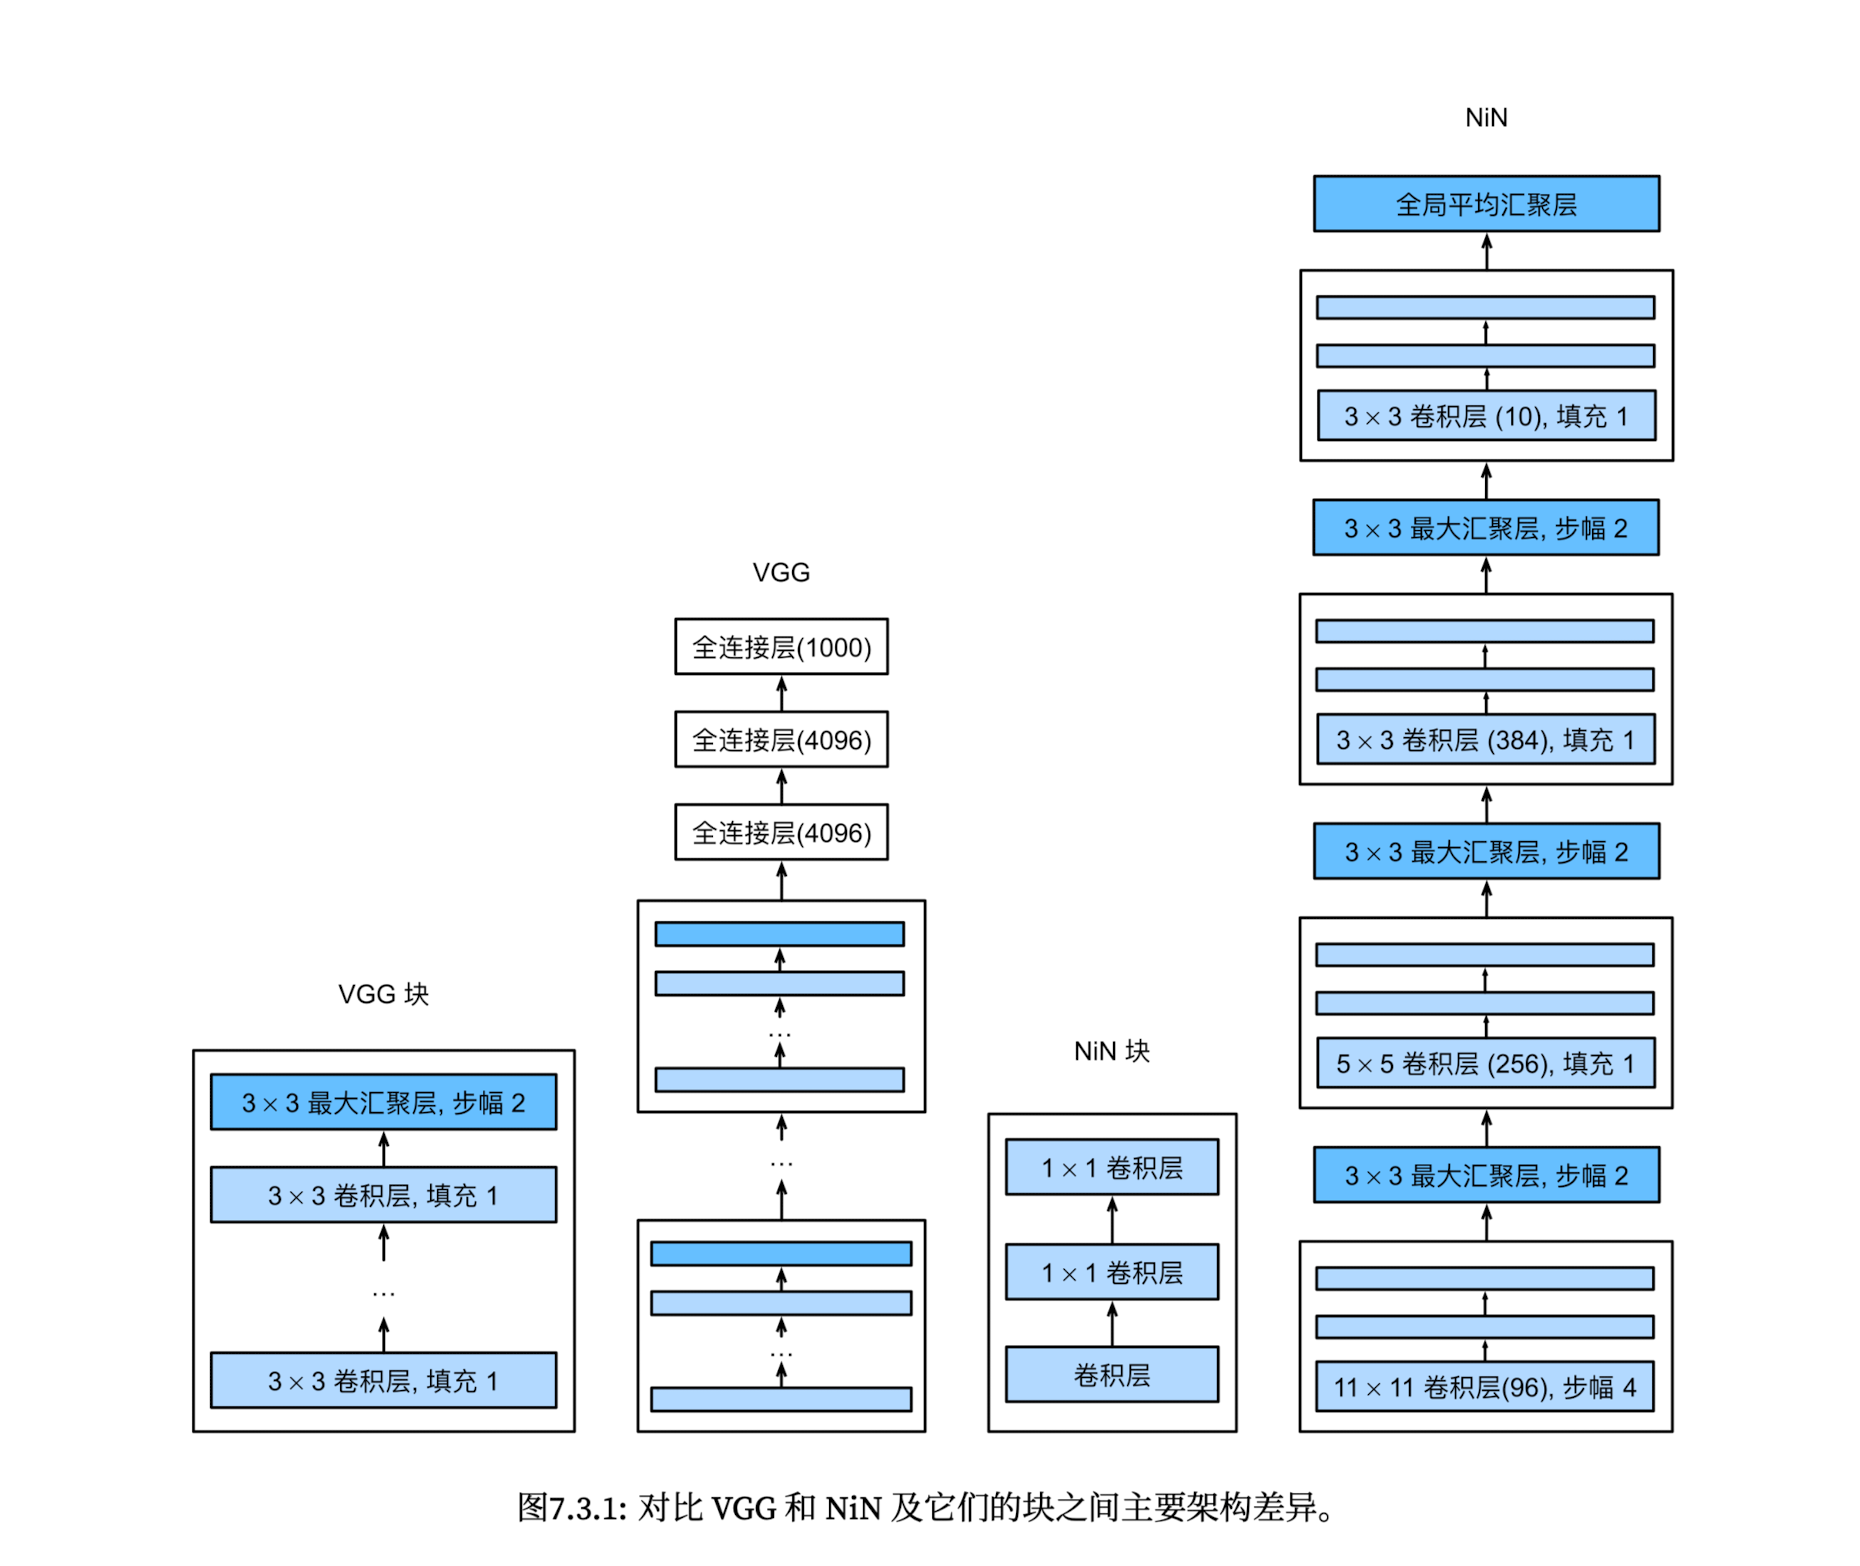

In [23]:
def nin_block(in_channels,out_channels,kernel_size,strides,padding):
    return nn.Sequential(
        nn.Conv2d(in_channels,out_channels,kernel_size,strides,padding),
        nn.ReLU(),
        nn.Conv2d(out_channels,out_channels,kernel_size=1),
        nn.ReLU(),
        nn.Conv2d(out_channels,out_channels,kernel_size=1),
        nn.ReLU()
    )

In [24]:
net = nn.Sequential(
    nin_block(1,96,kernel_size=11,strides=4,padding=0),
    nn.MaxPool2d(3,stride=2),
    nin_block(96,256,kernel_size=5,strides=1,padding=2),
    nn.MaxPool2d(3,stride=2),
    nin_block(256,384,kernel_size=3,strides=1,padding=1),
    nn.MaxPool2d(3,stride=2),
    nn.Dropout(0.5),
    # 标签类别数为10
    nin_block(384,10,kernel_size=3,strides=1,padding=1),
    nn.AdaptiveAvgPool2d((1,1)),
    # 将四维的输出转成二维的输出，其形状为（批量大小，10）
    nn.Flatten()
)

In [25]:
X = torch.rand(size=(1,1,224,224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape: \t',X.shape)
    # 创建一个数据样本来查看每个块的输出形状

Sequential output shape: 	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape: 	 torch.Size([1, 96, 26, 26])
Sequential output shape: 	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape: 	 torch.Size([1, 256, 12, 12])
Sequential output shape: 	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape: 	 torch.Size([1, 384, 5, 5])
Dropout output shape: 	 torch.Size([1, 384, 5, 5])
Sequential output shape: 	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape: 	 torch.Size([1, 10, 1, 1])
Flatten output shape: 	 torch.Size([1, 10])


KeyboardInterrupt: 

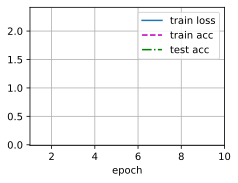

In [26]:
# 训练模型 所有的模型训练不了一点 跑不起来
lr,num_epochs,batch_size = 0.1,10,128
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())